In [4]:
import mercury as mr
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
app = mr.App(title='Generating Random Variables', description='Use the accept reject algorithm to generate random variables for a beta distribution', show_code=False, allow_download=False)
_ = mr.Note(text="Choose values for the Beta parameters:")
alpha_param = mr.Slider(value=3, min=2, max=10, label='alpha', step=1)
beta_param = mr.Slider(value=8, min=2, max=10, label='beta', step=1)
_ = mr.Note(text="Try generating a sample with more variables:")
num_vars = mr.Slider(value=10, min=5, max=1000, label='Number of Variables Generated', step=1)

mercury.App

Choose values for the Beta parameters:

mercury.Slider

mercury.Slider

Try generating a sample with more variables:

mercury.Slider

# Generating Random Variables for a Probability Distribution

Sometimes, we can use "direct" methods to generate random variables for a probability distribution.<br><br> For a direct method, we can generate the desired random variable $Y$ using a closed form function $Y = g(U)$ where $U \sim Uniform(0,1)$. The function $g$ makes use of the inverse Probability Integral Transform. (Recall that the Probability Integral Transform converts any distribution to uniform.)
<br><br>
However, if the transformation cannot be accomplished with the inverse PIT, other, "indirect" methods may be used. 




## Generating Beta Random Variables<br>


One example for which a direct transformation does not exist is the beta distribution whenever its parameters $\alpha$ and $\beta$ are nonintegers.<br><br>
Consider the pdf of $Y \sim Beta(a, b) $ with the parameters a and b chosen to be arbitrary positive nonintegers. <br><br>
Let $U, V \sim Uniform(0,1)$. 
We will place the beta distribution within a rectangle with side lengths 1 and $c = max_{Y}f_{Y}(y)$. 

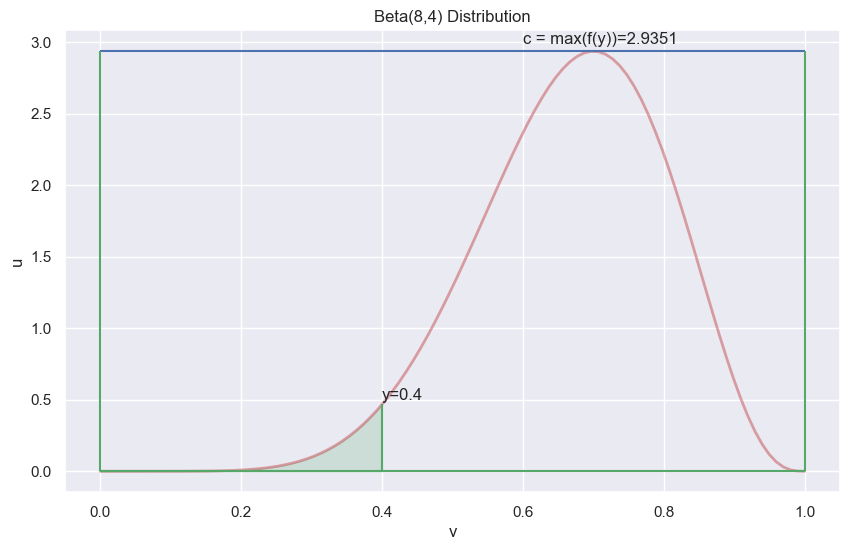

In [36]:
a = alpha_param.value
b = beta_param.value

def fy(y):
    beta_pdf = beta.pdf(y, a, b, loc=0, scale=1)
    return beta_pdf

beta_mode = (a - 1) / (a + b - 2)
c = fy(beta_mode)
x1 = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
x2 = np.linspace(0, 0.4, 100)

sns.set()
plt.figure(figsize=(10,6))
plt.plot(x1, fy(x1), 'r-', lw=2, alpha=0.5, label=f'beta({a},{b})')
plt.hlines(0, color='g', linestyle='-', xmin=0, xmax=1)
plt.hlines(c, color='b', linestyle='-', xmin=0, xmax=1, label=f'c={c:.4f}')
plt.vlines([0,1], color='g', linestyle='-', ymin=0, ymax=c)
plt.vlines(0.4, color='g', linestyle='-', ymin=0, ymax= fy(0.4), label='y=0.4')
plt.fill_between(x2, fy(x2), color='g', alpha=0.2)
plt.annotate(f'c = max(f(y))={c:.4f}', xy=(0.6, c+0.05))
plt.annotate('y=0.4', xy=(0.4, 0.5))
plt.xlabel('v')
plt.ylabel('u')
#plt.legend(loc='center right', fontsize='x-small')
plt.title(f'Beta({a},{b}) Distribution')
plt.show()

For an arbitrary y value (shown as y=0.4 in the figure), the area of the shaded region is

$$\Large P \bigg(V \leq y, U \leq \frac{1}{c} f_{Y}(V) \bigg) = \int_0^y \int_0^{\frac{f_{Y}(v)}{c}} \mathrm{d}u \mathrm{d}v = \frac{1}{c} \int_0^y f_{Y}(v) \mathrm{d}v = \frac{1}{c} P(Y \leq y)$$

From the above expression, observe that whenever y=1, $P(V \leq y) = 1$.<br>
It follows directly that $$\Large \frac{1}{c} = P \bigg(U \leq \frac{1}{c} f_{Y}(V) \bigg)$$ <br>
And we have $$\Large P(V \leq y) = \frac{P \bigg(V \leq y, U \leq \frac{1}{c} f_{Y}(V)\bigg)}{P \bigg(U \leq \frac{1}{c} f_{Y}(V) \bigg)} =P\bigg(V\leq y \mid U \leq \frac{1}{c} f_{Y}(V)\bigg)$$ <br>
This suggests that we can let y = v, provided that the corresponding value of u is under the density:





To generate $Y \sim Beta(\alpha,\beta)$:
1. Generate $(U,V)$ independent $Uniform(0,1)$.
2. If $U < \frac{1}{c}f_{y}(V)$, set $Y=V$. Otherwise return to step 1. 

In [29]:
def gen(n: int):
    output = np.zeros(n)
    i=0
    while i<n:
        U = np.random.uniform(size = 1)
        V = np.random.uniform(size = 1)
        if U < 1/c * fy(V):
            output[i] = V
            i+=1
    return output

Now, we can compare the histogram of the generated Y variables with the beta density function.<br>

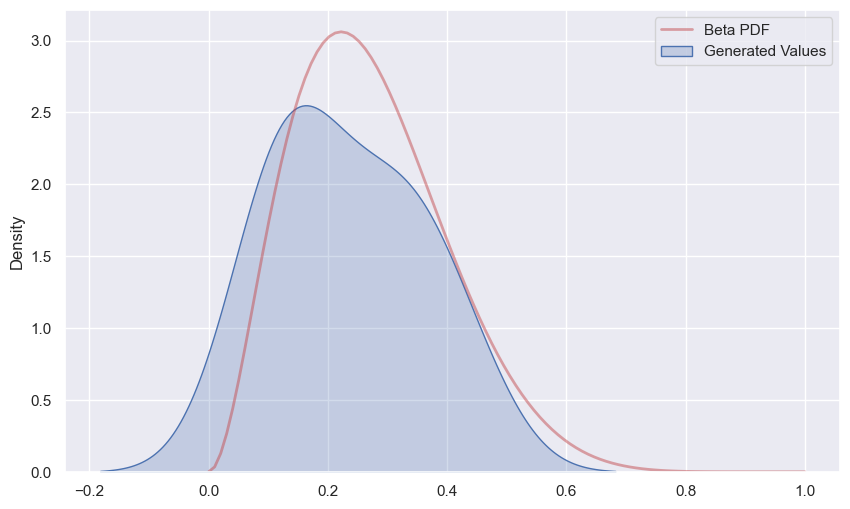

The expected value of the beta distribution is 0.2727
The sample mean of the generated beta variables is 0.2319

The variance of the beta distribution is 0.0165
The sample variance of the generated beta variables is 0.0142


In [30]:
Y = gen(num_vars.value)

plt.figure(figsize=(10,6))
plt.plot(x1, beta.pdf(x1, a, b, loc=0, scale=1), 'r-', lw=2, alpha=0.5, label='Beta PDF')
sns.kdeplot(Y, shade=True, label='Generated Values')
plt.legend()
plt.show()
print(f'The expected value of the beta distribution is {beta.mean(a, b, loc=0, scale=1):.4f}', 
      f'The sample mean of the generated beta variables is {np.mean(Y):.4f}\n',
        f'The variance of the beta distribution is {beta.var(a, b, loc=0, scale=1):.4f}',
     f'The sample variance of the generated beta variables is {np.var(Y):.4f}', sep='\n')


Observe that by increasing the number of Y generated, we get a sample that more closely resembles the beta function. This is an expected result by the Central Limit Theorem. 

#### Reference: Casella, Berger (2002) Section 5.6